In [17]:
using ZipFile, Distributed, CSV, DataFrames, Random, StatsBase, Plots, Statistics, StableRNGs, MLJBase

file = CSV.read("train.csv", DataFrame)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep
,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Float64
1,842,0,2.2,0,1,0,7,0.6
2,1021,1,0.5,1,0,1,53,0.7
3,563,1,0.5,1,2,1,41,0.9
4,615,1,2.5,0,0,0,10,0.8
5,1821,1,1.2,0,13,1,44,0.6
6,1859,0,0.5,1,3,0,22,0.7
7,1821,0,1.7,0,4,1,10,0.8
8,1954,0,0.5,1,0,0,24,0.8
9,1445,1,0.5,0,0,0,53,0.7


In [18]:
# Transfer DataFrame to matrix form
df = file |> Tables.matrix

# Transfer the dataset to 2-classifiers. df_0 represents the result is 0, df_1 represents the result is 1.
# Due to my datasset is binary problems, and each result is 50 percents of the whole dataset. So i didn't add any other pre-actions for dataset. 

mat_0 = df[df[:,21] .<= 1, :]
mat_1 = df[df[:,21] .>= 2, :]


1000×21 Matrix{Float64}:
 1021.0  1.0  0.5  1.0   0.0  1.0  53.0  …   3.0   7.0  1.0  1.0  0.0  2.0
  563.0  1.0  0.5  1.0   2.0  1.0  41.0      2.0   9.0  1.0  1.0  0.0  2.0
  615.0  1.0  2.5  0.0   0.0  0.0  10.0      8.0  11.0  1.0  0.0  0.0  2.0
 1821.0  0.0  1.7  0.0   4.0  1.0  10.0      8.0  18.0  1.0  0.0  1.0  3.0
  769.0  1.0  2.9  1.0   0.0  0.0   9.0      2.0   7.0  0.0  0.0  0.0  3.0
 1520.0  1.0  2.2  0.0   5.0  1.0  33.0  …   9.0  13.0  1.0  1.0  1.0  3.0
  803.0  1.0  2.1  0.0   7.0  0.0  17.0      1.0   4.0  1.0  0.0  1.0  2.0
  838.0  0.0  0.5  0.0   1.0  1.0  13.0      9.0  19.0  1.0  0.0  1.0  3.0
  595.0  0.0  0.9  1.0   7.0  1.0  23.0      2.0  18.0  1.0  1.0  0.0  3.0
  772.0  0.0  1.1  1.0  12.0  0.0  39.0     15.0   3.0  1.0  1.0  0.0  3.0
 1709.0  1.0  2.1  0.0   1.0  0.0  13.0  …   1.0  15.0  1.0  0.0  0.0  3.0
  961.0  1.0  1.4  1.0   0.0  1.0  57.0      9.0   7.0  1.0  1.0  1.0  2.0
  519.0  1.0  1.6  1.0   7.0  1.0  51.0      1.0   4.0  1.0  0.0  1.0  3.0


In [19]:
# randomly select 70% data from data set as the train data

train_data = randsubseq(1:1000, 0.7)
train_df = vcat(mat_0[train_data, :], mat_1[train_data, :])

# select the rest as the test data 

test_data = [i for i in 1:1000 if isempty(searchsorted(train_data, i))]
test_df = vcat(mat_0[test_data, :], mat_1[test_data, :])

644×21 Matrix{Float64}:
  842.0  0.0  2.2  0.0  1.0  0.0   7.0  …   7.0  19.0  0.0  0.0  1.0  1.0
 1445.0  1.0  0.5  0.0  0.0  0.0  53.0      1.0  20.0  1.0  0.0  0.0  0.0
  509.0  1.0  0.6  1.0  2.0  1.0   9.0     10.0  12.0  1.0  0.0  0.0  0.0
  503.0  0.0  1.2  1.0  5.0  1.0   8.0      0.0  12.0  1.0  0.0  0.0  1.0
 1319.0  1.0  0.9  0.0  3.0  1.0  41.0      5.0   3.0  1.0  1.0  1.0  1.0
  589.0  1.0  2.3  1.0  1.0  0.0  61.0  …   7.0   2.0  1.0  0.0  1.0  1.0
 1656.0  0.0  1.0  0.0  5.0  1.0  34.0     12.0  14.0  1.0  1.0  0.0  1.0
 1195.0  1.0  2.8  0.0  1.0  1.0  20.0      3.0  12.0  1.0  1.0  0.0  0.0
 1054.0  1.0  1.8  1.0  3.0  1.0  40.0     12.0  12.0  1.0  0.0  1.0  1.0
 1757.0  0.0  0.5  0.0  8.0  0.0  49.0      5.0   4.0  0.0  0.0  0.0  1.0
  799.0  1.0  2.3  0.0  1.0  1.0  63.0  …   6.0   6.0  1.0  1.0  1.0  0.0
 1156.0  1.0  1.2  1.0  0.0  1.0  50.0      0.0  15.0  1.0  1.0  0.0  0.0
 1242.0  0.0  1.1  1.0  0.0  0.0  10.0      1.0   4.0  1.0  0.0  1.0  0.0
    ⋮         

In [20]:
# parameters of the training and testing data
para_train = train_df[:, 1:20]
para_test = test_df[:, 1:20]

# value is never used?
value_train = train_df[:, 21]
value_test = test_df[:, 21]
value_train = reshape(value_train, (1, :)) 
value_test = reshape(value_test, (1, :)) 


1×644 Matrix{Float64}:
 1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  …  2.0  2.0  3.0  2.0  3.0  3.0  3.0

In [21]:
dt = StatsBase.fit(ZScoreTransform, para_train, dims=1)

para_train_std = StatsBase.transform(dt, para_train)
para_test_std = StatsBase.transform(dt, para_test)

para_train_std = transpose(para_train_std) 
para_test_std = transpose(para_test_std)

20×644 transpose(::Matrix{Float64}) with eltype Float64:
 -0.911359   0.479363  -1.67937    …   0.811476  -0.184863  -0.874458
 -0.995218   1.00406    1.00406       -0.995218   1.00406   -0.995218
  0.844989  -1.2522    -1.12884       -1.12884   -0.882107   0.844989
 -0.992286  -0.992286   1.00703       -0.992286  -0.992286  -0.992286
 -0.767827  -0.996959  -0.538696      -0.996959   0.606962  -0.767827
 -1.04643   -1.04643    0.954924   …  -1.04643   -1.04643   -1.04643
 -1.37722    1.16805   -1.26656       -1.48788   -0.27058    1.00206
  0.343417   0.690935  -1.39417        1.03845   -1.39417   -1.39417
  1.36979    0.974698  -1.31118       -0.774989  -1.45229   -1.56517
 -1.12675    1.07036    0.191518       0.191518   1.50978   -1.56617
 -1.30526    0.666992   0.831346   …  -1.30526   -0.319133  -1.30526
 -1.44899   -0.620707   1.07886        0.261893   2.3394    -0.29935
 -1.14564   -0.961879  -0.0706476      0.326731   1.24782    0.370374
  0.409131  -0.934241  -1.47715        1

In [22]:
function initialise_model_weights(layer_dims, seed = 7)
    params = Dict()

    for l=2:length(layer_dims)
        params[string("W_", (l-1))] = rand(StableRNG(seed), layer_dims[l], layer_dims[l-1]) * sqrt(2 / layer_dims[l-1])
        params[string("b_", (l-1))] = zeros(layer_dims[l], 1)
    end

    return params
end

initialise_model_weights (generic function with 2 methods)

In [23]:

function sigmoid(Z)
    A = 1 ./ (1 .+ exp.(.-Z))
    return (A = A, Z = Z)
end

function linear_forward(A, W, b)
    Z = (W * A) .+ b
    cache = (A, W, b)

    @assert size(Z) == (size(W, 1), size(A, 2))

    return (Z = Z, cache = cache)
end

function forward_activation(A_prev, W, b, activation_function="sigmoid")
    Z, linear_cache = linear_forward(A_prev, W, b)

    if activation_function == "sigmoid"
        A, activation_cache = sigmoid(Z)
    end

    cache = (linear_step_cache=linear_cache, activation_step_cache=activation_cache)

    @assert size(A) == (size(W, 1), size(A_prev, 2))

    return A, cache
end


function forward_propagate_model_weights(input, parameters)
    master_cache = []
    A = input
    L = Int(length(parameters) / 2)

    for l = 1 : (L-1)
        A_prev = A
        A, cache = forward_activation(A_prev, parameters[string("W_", (l))], parameters[string("b_", (l))], "sigmoid")
        push!(master_cache , cache)
    end

    Ŷ, cache = forward_activation(A, parameters[string("W_", (L))], parameters[string("b_", (L))], "sigmoid")
    push!(master_cache, cache)

    return Ŷ, master_cache
end

function calculate_cost(Ŷ, Y)
    m = max(size(Y, 2), size(Y, 1))
    epsilon = eps(1.0)

    Ŷ_new = [max(i, epsilon) for i in Ŷ]
    Ŷ_new = [min(i, 1-epsilon) for i in Ŷ_new]

    cost = -sum(Y .* log.(Ŷ_new) + (1 .- Y) .* log.(1 .- Ŷ_new)) / m
    return cost
end

calculate_cost (generic function with 1 method)

In [24]:
function sigmoid_backwards(∂A, activated_cache)
    s = sigmoid(activated_cache).A
    ∂Z = ∂A .* s .* (1 .- s)

    @assert (size(∂Z) == size(activated_cache))
    return ∂Z
end

function linear_backward(∂Z, cache)
    # Unpack cache
    A_prev , W , b = cache
    m = size(A_prev, 2)

    # Partial derivates of each of the components
    ∂W = ∂Z * (A_prev') / m
    ∂b = sum(∂Z, dims = 2) / m
    ∂A_prev = (W') * ∂Z

    @assert (size(∂A_prev) == size(A_prev))
    @assert (size(∂W) == size(W))
    @assert (size(∂b) == size(b))

    return ∂W , ∂b , ∂A_prev
end

function activation_backward(∂A, cache, activation_function="sigmiod")
    @assert activation_function ∈ ("sigmoid", "relu")

    linear_cache , cache_activation = cache

    if (activation_function == "relu")

        ∂Z = relu_backwards(∂A , cache_activation)
        ∂W , ∂b , ∂A_prev = linear_backward(∂Z , linear_cache)

    elseif (activation_function == "sigmoid")

        ∂Z = sigmoid_backwards(∂A , cache_activation)
        ∂W , ∂b , ∂A_prev = linear_backward(∂Z , linear_cache)

    end

    return ∂W , ∂b , ∂A_prev
end

activation_backward (generic function with 2 methods)

In [25]:
function back_propagate_model_weights(Ŷ, Y, master_cache)
    ∇ = Dict()

    L = length(master_cache)
    Y = reshape(Y , size(Ŷ))

    ∂Ŷ = (-(Y ./ Ŷ) .+ ((1 .- Y) ./ ( 1 .- Ŷ)))
    current_cache = master_cache[L]

        ∇[string("∂W_", (L))], ∇[string("∂b_", (L))], ∇[string("∂A_", (L-1))] = activation_backward(∂Ŷ, current_cache, "sigmoid")

    for l=reverse(0:L-2)
        current_cache = master_cache[l+1]
        ∇[string("∂W_", (l+1))], ∇[string("∂b_", (l+1))], ∇[string("∂A_", (l))] = activation_backward(∇[string("∂A_", (l+1))],
                                                                                                             current_cache,
                                                                                                             "sigmoid")
    end
    return ∇
end

back_propagate_model_weights (generic function with 1 method)

In [26]:

function update_model_weights(parameters, ∇, η)
    L = Int(length(parameters) / 2)

    for l = 0: (L-1)
        parameters[string("W_", (l + 1))] -= η .* ∇[string("∂W_", (l + 1))]
        parameters[string("b_", (l + 1))] -= η .* ∇[string("∂b_", (l + 1))]
    end

    return parameters
end


function calculate_accuracy(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum((Ŷ .> 0.5) .== Y) / length(Y)
end

calculate_accuracy (generic function with 1 method)

In [27]:
function assess_accuracy(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum((Ŷ .> 0.5) .== Y) / length(Y)
end

assess_accuracy (generic function with 1 method)

In [28]:

function update_model_weights_counts(parameters_old,parameters_new)
    L=Int(length(parameters_old) / 2)
    count=0
    for l = 0 : (L-1)
        for m=1:Int(size(parameters_old[string("W_",(l+1))])[L])
            if parameters_old[string("W_",(l+1))]!=parameters_new[string("W_",(l+1))]
                count=count+1
            end
        end
    end
    return count
end
        

update_model_weights_counts (generic function with 1 method)

In [29]:
function train_network(layer_dims , DMatrix, Y;  η=0.001, epochs=10, seed=2020, verbose=true)
    # Initiate an empty container for cost, iterations, and accuracy at each iteration
    costs = []
    iters = []
    accuracy = []

    # Initialise random weights for the network
    params = initialise_model_weights(layer_dims, seed)

    println(length(layer_dims))

    println("lolololol")

    # Train the network
    for i = 1:epochs

        Ŷ , caches  = forward_propagate_model_weights(DMatrix, params)
        cost = calculate_cost(Ŷ, Y)
        acc = assess_accuracy(Ŷ, Y)
        ∇  = back_propagate_model_weights(Ŷ, Y, caches)
        # each time starting with a different set of randomly initialized weights
        params = initialise_model_weights(layer_dims, seed)
        # params = update_model_weights(params, ∇, η)

        if verbose
            println("Iteration -> $i, Cost -> $cost, Accuracy -> $acc")
        end

        # Update containers for cost, iterations, and accuracy at the current iteration (epoch)
        push!(iters , i)
        push!(costs , cost)
        push!(accuracy , acc)
    end
        return (cost = costs, iterations = iters, accuracy = accuracy, parameters = params)
end

train_network (generic function with 1 method)

4
lolololol
Iteration -> 1, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 2, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 3, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 4, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 5, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 6, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 7, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 8, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 9, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633
Iteration -> 10, Cost -> 0.010884075162634834, Accuracy -> 0.24926253687315633


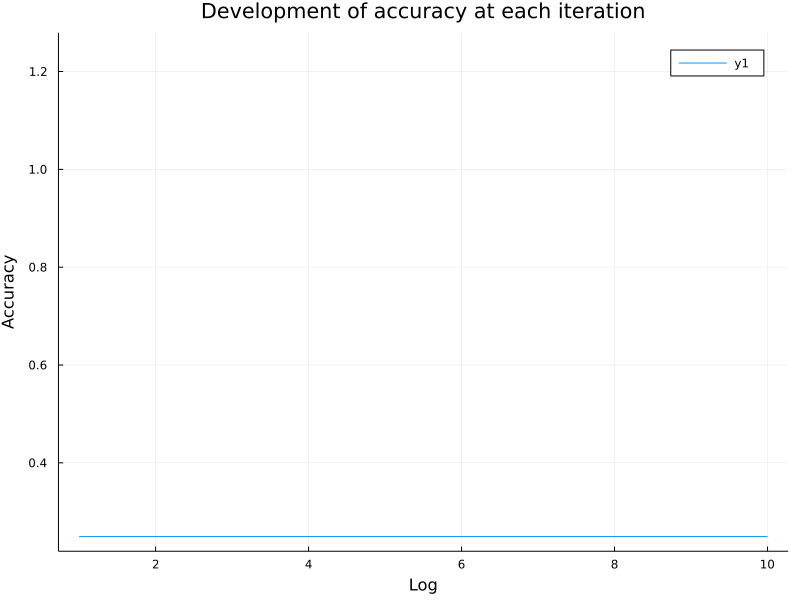

In [36]:
# https://docs.juliahub.com/MLJ/rAU56/0.13.0/generating_synthetic_data/
X, y = make_blobs(10_000, 3; centers=2, as_table=false, rng=2020);
X = Matrix(X');
#reshape the size of y: https://www.geeksforgeeks.org/reshaping-array-dimensions-in-julia-array-reshape-method/; https://www.geeksforgeeks.org/manipulating-matrices-in-julia/
# we need a size of y with 1 row and column same as the test/training data size
y = reshape(y, (1, size(X, 2)));
f(x) =  x == 2 ? 0 : x
y2 = f.(y);

# Input dimensions
input_dim = size(X, 1);

# Train the model
# nn_results = train_network([input_dim, 5, 3, 1], X, y2; η=0.01, epochs=10, seed=1, verbose=true);

nn_results = train_network([size(para_train_std, 1), 5, 3, 1], para_train_std, value_train; η=0.01, epochs=10, seed=1, verbose=true);

# Plot accuracy per iteration
p1 = plot(nn_results.accuracy,
         xlabel="Log",
         ylabel="Accuracy",
         title="Development of accuracy at each iteration");

# Combine accuracy and cost plots
plot(p1, layout = (2, 1), size = (800, 600))

In [35]:
println(typeof(para_test))
println(typeof(value_test))
println(typeof(size(value_test,1)))

println(size(value_test))
println(size(para_test_std))
println(size([size(para_train, 1), 5, 3, 1]))

println(typeof(X))
println(typeof(y))
println(size(X))
println(size(y))

Matrix{Float64}
Matrix{Float64}
Int64
(1, 644)
(20, 644)
(4,)
Matrix{Float64}
Matrix{Int64}
(3, 10000)
(1, 10000)
